# Kompresija podataka

QR rastav s pivotiranjem stupaca možemo koristiti za _kompresiju (sažimanje) podataka_.

Dijagonalni elementi matrice $R$ padaju po apsolutnoj vrijednosti pa možemo odrezati djelove matrica $Q$ i $R$ za koje smatramo da nisu značajni.

Dat ćemo primjer kompresije slike.

In [4]:
using Images, ImageMagick

In [1]:
, ImageMagick, FixedPointNumbers, Colors

ArgumentError: ArgumentError: Package Images not found in current path:
- Run `import Pkg; Pkg.add("Images")` to install the Images package.


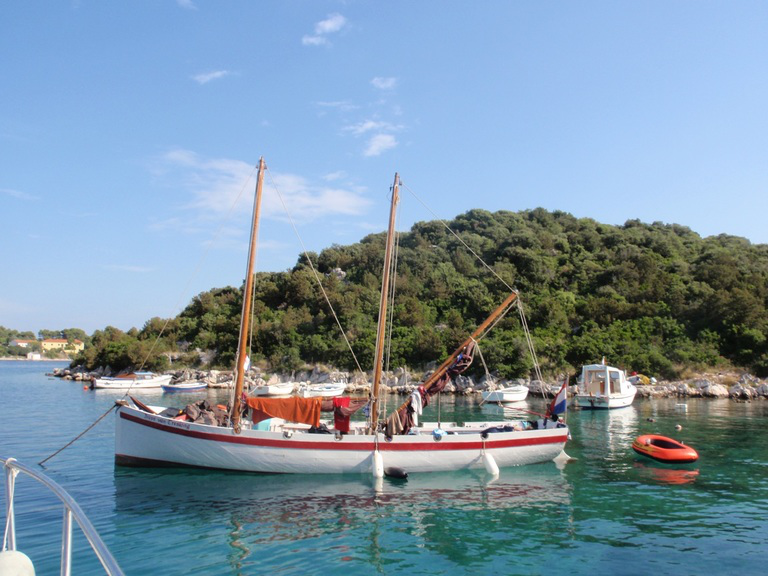

In [5]:
img=load("P8040001a.jpg")

In [6]:
# Opis podataka
typeof(img)

Array{RGB{Normed{UInt8,8}},2}

In [7]:
img[1,1]

In [8]:
show(img[1,1])

RGB{N0f8}(0.439,0.624,0.843)

In [9]:
# Razdvojimo sliku na R, G i B komponente
#imgsep=permuteddimsview(channelview(img), (2, 3, 1));
channels=float(channelview(img))

3×576×768 Array{Float32,3}:
[:, :, 1] =
 0.439216  0.447059  0.439216  0.435294  …  0.890196  0.894118  0.894118
 0.623529  0.631373  0.623529  0.619608     0.890196  0.894118  0.894118
 0.843137  0.85098   0.843137  0.839216     0.85098   0.854902  0.854902

[:, :, 2] =
 0.439216  0.443137  0.443137  0.439216  …  0.890196  0.894118  0.894118
 0.623529  0.627451  0.627451  0.623529     0.890196  0.894118  0.894118
 0.843137  0.847059  0.847059  0.843137     0.85098   0.854902  0.854902

[:, :, 3] =
 0.443137  0.439216  0.447059  0.447059  …  0.898039  0.901961  0.901961
 0.627451  0.623529  0.631373  0.631373     0.898039  0.901961  0.901961
 0.847059  0.843137  0.85098   0.85098      0.858824  0.862745  0.862745

...

[:, :, 766] =
 0.619608  0.623529  0.623529  0.623529  …  0.301961  0.301961  0.286275
 0.768628  0.772549  0.772549  0.772549     0.478431  0.478431  0.462745
 0.952941  0.956863  0.956863  0.956863     0.6       0.6       0.584314

[:, :, 767] =
 0.623529  0.623529  0.

In [10]:
Red=channels[1,:,:]
Green=channels[2,:,:]
Blue=channels[3,:,:]

576×768 Array{Float32,2}:
 0.843137  0.843137  0.847059  0.847059  …  0.952941  0.964706  0.968628
 0.85098   0.847059  0.843137  0.839216     0.956863  0.964706  0.964706
 0.843137  0.847059  0.85098   0.85098      0.956863  0.960784  0.960784
 0.839216  0.843137  0.85098   0.854902     0.956863  0.952941  0.960784
 0.85098   0.847059  0.843137  0.839216     0.956863  0.956863  0.952941
 0.847059  0.847059  0.843137  0.843137  …  0.956863  0.956863  0.956863
 0.839216  0.843137  0.85098   0.854902     0.956863  0.956863  0.956863
 0.847059  0.847059  0.847059  0.847059     0.956863  0.956863  0.952941
 0.854902  0.854902  0.854902  0.854902     0.952941  0.952941  0.956863
 0.854902  0.85098   0.847059  0.847059     0.960784  0.956863  0.960784
 0.854902  0.85098   0.847059  0.847059  …  0.956863  0.956863  0.956863
 0.858824  0.854902  0.85098   0.85098      0.956863  0.952941  0.952941
 0.854902  0.854902  0.854902  0.85098      0.960784  0.960784  0.956863
 ⋮                       

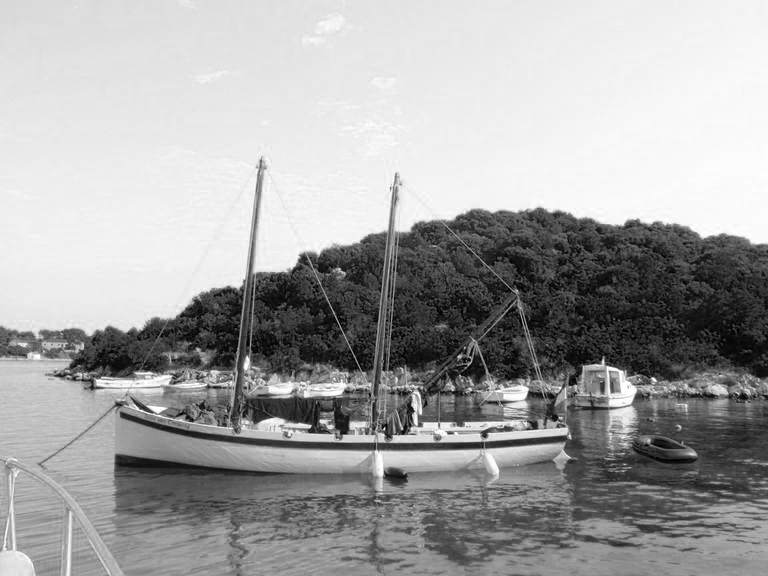

In [11]:
colorview(Gray,Blue)

In [14]:
# Izračunajmo QR rastav s pivotiranjem matrice svakog kanala
using LinearAlgebra
R=qr(Red,Val(true))
G=qr(Green,Val(true))
B=qr(Blue,Val(true));

In [15]:
norm(R.Q*R.R[:,invperm(R.p)]-float(Red))

0.00020910783f0

In [16]:
import Gadfly

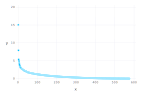

In [20]:
# Nacrtajmo dijagonalne elemente
Gadfly.plot(x=1:size(R.R,1),y=abs.(diag(R.R)))

In [29]:
# Izračunajmo komprimirane matrice za svaki kanal, Rc, Gc i Bc
k=50
RedC=Matrix(R.Q)[:,1:k]*R.R[1:k,invperm(R.p)]
GreenC=Matrix(G.Q)[:,1:k]*G.R[1:k,invperm(G.p)]
BlueC=Matrix(B.Q)[:,1:k]*B.R[1:k,invperm(B.p)]

576×768 Array{Float32,2}:
 0.846009  0.845908  0.846347  0.847124  …  0.952303  0.952581  0.954205
 0.846752  0.847336  0.847957  0.848277     0.95254   0.953014  0.954357
 0.850864  0.851758  0.852974  0.853171     0.953747  0.9537    0.956009
 0.853217  0.853922  0.854729  0.853921     0.953028  0.95291   0.955143
 0.855111  0.855731  0.856358  0.855784     0.950925  0.951316  0.953952
 0.854893  0.855375  0.855883  0.856206  …  0.949433  0.949907  0.952582
 0.855159  0.855322  0.855875  0.856268     0.95544   0.955519  0.957598
 0.855548  0.856303  0.85657   0.857649     0.951908  0.951511  0.952662
 0.853055  0.853722  0.854407  0.856438     0.948731  0.948006  0.948622
 0.857237  0.857739  0.85757   0.858625     0.95457   0.953532  0.953981
 0.860174  0.860686  0.860601  0.86153   …  0.9535    0.952296  0.952384
 0.860947  0.861715  0.861924  0.862076     0.950508  0.950109  0.950441
 0.859382  0.859246  0.859719  0.859474     0.953047  0.9532    0.953628
 ⋮                       

In [14]:
# Odrežimo elemente <0 i >1
Rc=min.(max.(Rc,0),1)
Gc=min.(max.(Gc,0),1)
Bc=min.(max.(Bc,0),1)

576×768 Array{Float32,2}:
 0.849221  0.84942   0.849614  0.848986  …  0.951222  0.951217  0.952344
 0.850834  0.850977  0.851206  0.850909     0.951579  0.951397  0.95198 
 0.854566  0.855033  0.855641  0.854222     0.952285  0.952251  0.954134
 0.856747  0.856969  0.857194  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860862  0.861022  0.859646     0.951365  0.952203  0.9542  
 0.859467  0.859761  0.860209  0.860274  …  0.949737  0.949304  0.950518
 0.856315  0.856868  0.857974  0.858546     0.954991  0.953995  0.954868
 0.853424  0.854004  0.854706  0.856621     0.959859  0.958582  0.957889
 0.855779  0.856114  0.856438  0.858547     0.950205  0.948848  0.947465
 0.857619  0.85837   0.858482  0.859991     0.956398  0.954146  0.952858
 0.861171  0.862007  0.862343  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862676     0.952246  0.951358  0.95138 
 ⋮                       

In [31]:
norm(Red-RedC)/norm(Red)

0.10691222f0

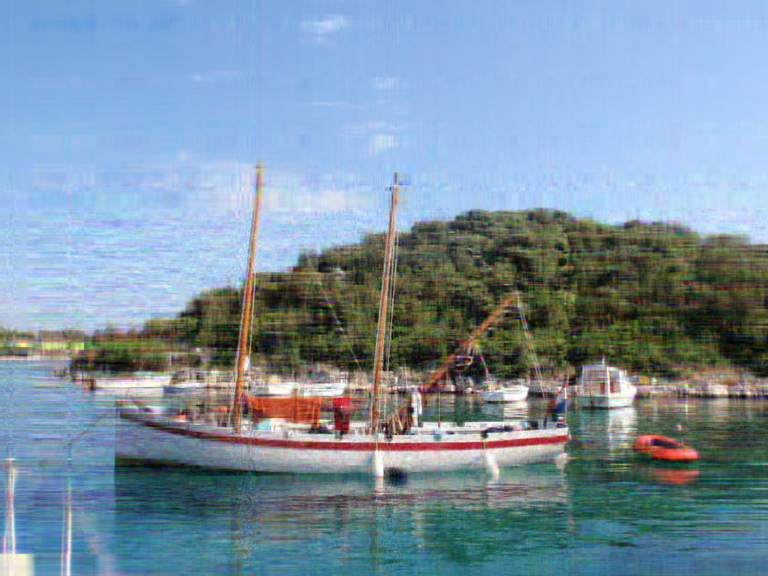

In [33]:
# Nacrtajmo komprimiranu sliku
colorview(RGB, RedC, GreenC, BlueC)

In [17]:
# Pogledajmo kako raste kvaliteta
using Interact

Interact.Options{:SelectionSlider,Int64}(1: "input" = 100 Int64 , "k1", 100, "100", 100, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(11=>"11",134=>"134",158=>"158",160=>"160",29=>"29",131=>"131",173=>"173",74=>"74",176=>"176",57=>"57"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Int64}(3: "input-2" = 100 Int64 , "k2", 100, "100", 100, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(11=>"11",134=>"134",158=>"158",160=>"160",29=>"29",131=>"131",173=>"173",74=>"74",176=>"176",57=>"57"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Int64}(5: "input-3" = 100 Int64 , "k3", 100, "100", 100, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(11=>"11",134=>"134",158=>"158",160=>"160",29=>"29",131=>"131",173=>"173",74=>"74",176=>"176",57=>"57"…)), Any[], Any[], true, "horizontal")

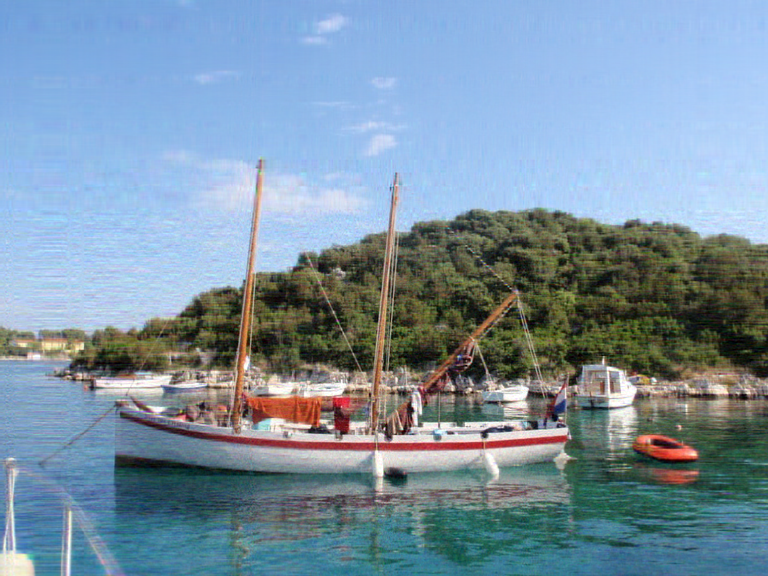

In [18]:
n = 200
@manipulate for k1 in 1:n, k2 in 1:n, k3 in 1:n
    Rc=qR[:,1:k1]*rR[1:k1,invperm(pR)]
    Gc=qG[:,1:k2]*rG[1:k2,invperm(pG)]
    Bc=qB[:,1:k3]*rB[1:k3,invperm(pB)]
    Rc=min.(max.(Rc,0),1)
    Gc=min.(max.(Gc,0),1)
    Bc=min.(max.(Bc,0),1)
    colorview(RGB,Rc,Gc,Bc)
end